In [24]:
import os
import cv2
import numpy as np
from sklearn.utils import shuffle


folder_path_circle = "/Users/coldbrew/Documents/SKT_FLY/2주차/data/shapes/circles"
folder_path_square = "/Users/coldbrew/Documents/SKT_FLY/2주차/data/shapes/squares"
folder_path_triangle = "/Users/coldbrew/Documents/SKT_FLY/2주차/data/shapes/triangles"

def load_images_with_label(folder_path, label):
    data = []
    for filename in os.listdir(folder_path):
        if filename.lower().endswith((".jpg", ".png")):
            file_path = os.path.join(folder_path, filename)
            img = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)

            if img is not None:
                # (이미지, 레이블) 쌍으로 추가
                img_resized = cv2.resize(img, (28,28))
                # img_flat = img_resized.flatten() 
                data.append((img_resized, label))
    return data

# 각각의 폴더에서 이미지 불러오기
circle_data = load_images_with_label(folder_path_circle, 0)
square_data = load_images_with_label(folder_path_square, 1)
triangle_data = load_images_with_label(folder_path_triangle, 2)

# 전체 데이터셋 합치기
dataset = circle_data + square_data + triangle_data


print("데이터셋 크기:", len(dataset))
print("예시 (첫 번째 샘플):", dataset[0])
from sklearn.model_selection import train_test_split
X = [d[0] for d in dataset] 
y = [d[1] for d in dataset]

X = abs((np.array(X) / 255.0)-1)
y = np.array(y)

X, y = shuffle(X, y)


데이터셋 크기: 300
예시 (첫 번째 샘플): (array([[255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255, 255, 252, 191, 124, 134, 159, 212, 250, 255, 255, 255,
        255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255, 222,  77,  55, 112, 157, 130,  73, 187, 255, 255, 255,
        255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        242, 151,  55, 170, 253, 255, 255, 255, 179, 123, 243, 255, 255,
        255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 235,
        130, 120, 230, 255, 255, 255, 255, 255, 236,  99, 218, 255, 255,
 

In [25]:
X.shape, y.shape

((300, 28, 28), (300,))

In [26]:

# train/test 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.3, 
                                                    random_state=42)


In [27]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((210, 28, 28), (210,), (90, 28, 28), (90,))

In [28]:
import tensorflow as tf
from tensorflow import keras
from keras import models, layers
from keras.layers import Input

model = models.Sequential([
    Input(shape=(28, 28)),
    layers.Flatten(),
    layers.Dense(512, activation='relu'), 
    layers.Dropout(0.3), 
    layers.Dense(256, activation='relu'), 
    layers.Dropout(0.3),  
    layers.Dense(128, activation='relu'),
    layers.Dense(3, activation='softmax') 
])

model.compile(optimizer='adam',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=30, batch_size=32, validation_split=0.2,)


Epoch 1/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.3720 - loss: 1.1110 - val_accuracy: 0.4333 - val_loss: 1.0398
Epoch 2/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5898 - loss: 0.9704 - val_accuracy: 0.5833 - val_loss: 0.9401
Epoch 3/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7496 - loss: 0.7846 - val_accuracy: 0.6000 - val_loss: 0.8806
Epoch 4/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8039 - loss: 0.5638 - val_accuracy: 0.5500 - val_loss: 0.9739
Epoch 5/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8572 - loss: 0.3849 - val_accuracy: 0.5500 - val_loss: 1.2507
Epoch 6/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9283 - loss: 0.2520 - val_accuracy: 0.5667 - val_loss: 1.1494
Epoch 7/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9694 - loss: 0.1379 - val_accuracy: 0.6000 - val_loss: 1.3593
Epoch 8/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9917 - loss: 0.0703 - val_accuracy: 0.6000 - val_loss: 1.3127
Epoch 9

In [29]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_3 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,699,595 (6.48 MB)

 Trainable params: 566,531 (2.16 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,133,064 (4.32 MB)

In [30]:
# test_loss, test_accuracy = model.evaluate(X_test, y_test)
# print(f'Test accuracy: {test_accuracy:.4f}')
model.evaluate(X_test, y_test)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9465 - loss: 0.1530 


[0.1295841932296753, 0.9555555582046509]

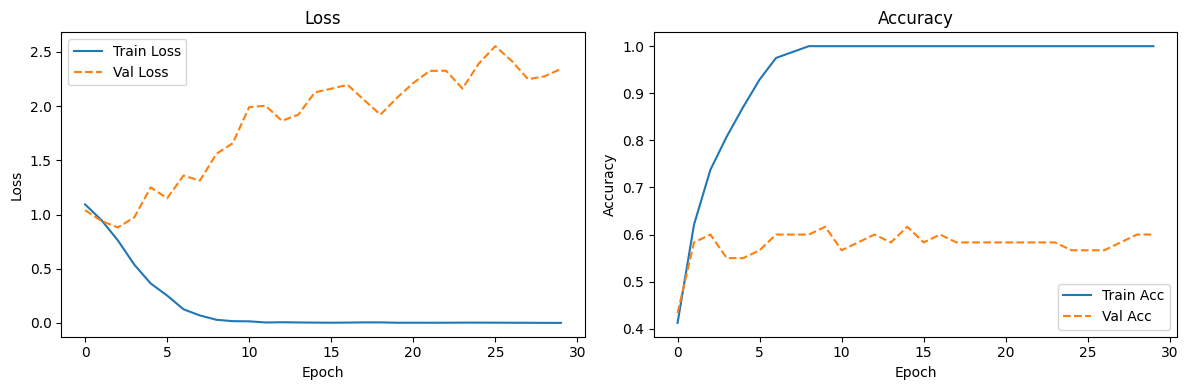

In [31]:
import matplotlib.pyplot as plt

# history 객체에는 학습 과정의 손실/정확도 정보가 저장됨
# 예: history = model.fit(...)

plt.figure(figsize=(12, 4))

# 1) Loss 시각화
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss', linestyle='--')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# 2) Accuracy 시각화
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc', linestyle='--')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()